In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

## Running K-means on Banadir Only

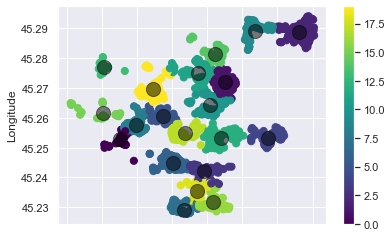

In [3]:
df = pd.read_csv('master_list_csv.csv')
df_banadir = df.loc[df['Region'] == 'Banadir']
X=df_banadir.loc[:,['CCCM IDP Site Code','Latitude','Longitude']]
kmeans = KMeans(n_clusters = 20, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [4]:
clustered_data_banadir = df_banadir.merge(X.loc[:,['CCCM IDP Site Code','cluster_label']], left_on='CCCM IDP Site Code', right_on='CCCM IDP Site Code')
clustered_data_banadir["cluster_key"] = clustered_data_banadir["Region"] + "_enum_" + clustered_data_banadir["cluster_label"].astype(str)
clustered_data_banadir.head(5)

,CCCM IDP Site Code,Region,District,Settlement,HH,Ind,Latitude,Longitude,Neighbourhood,Neighbourhood Type,Source,IDP Code (REACH DSA4),district_code,cluster_label,cluster_key
0,CCCM-SO220114-0001,Banadir,Mogadishu Dharkenley,Aaran,85,240,2.039170,45.276457,NaN,NaN,DSA4,DSA4-SOM220104-020,SOM220104,13,Banadir_enum_13
1,CCCM-SO220114-0002,Banadir,Mogadishu Dharkenley,Al Faraj,130,383,2.034050,45.262008,NaN,NaN,DSA4,DSA4-SOM220104-001,SOM220104,15,Banadir_enum_15
2,CCCM-SO220114-0003,Banadir,Mogadishu Dharkenley,Al Raxma,73,252,2.033203,45.263296,NaN,NaN,DSA4,DSA4-SOM220104-002,SOM220104,15,Banadir_enum_15
3,CCCM-SO220114-0004,Banadir,Mogadishu Dharkenley,Ala Naciim,50,304,2.040128,45.275869,NaN,NaN,DSA4,DSA4-SOM220104-021,SOM220104,13,Banadir_enum_13
4,CCCM-SO220114-0005,Banadir,Mogadishu Dharkenley,Ala Umaqan,40,220,2.040409,45.275894,NaN,NaN,DSA4,DSA4-SOM220104-022,SOM220104,13,Banadir_enum_13


## Loading the master list and excluding Banadir

In [5]:
df = pd.read_csv('master_list_csv.csv')
df = df.loc[df['Region'] != 'Banadir']
df.head(5)

,CCCM IDP Site Code,Region,District,Settlement,HH,Ind,Latitude,Longitude,Neighbourhood,Neighbourhood Type,Source,IDP Code (REACH DSA4),district_code
0,CCCM-SO1101-0001,Awdal,Borama,Boon,245,"1,475",10.191367,43.092248,NaN,NaN,DSA4,DSA4-SO1101-009,SO1101
1,CCCM-SO1101-0002,Awdal,Borama,Caydh Doon,300,"1,800",10.191523,43.091894,NaN,NaN,DSA4,DSA4-SO1101-010,SO1101
2,CCCM-SO1101-0003,Awdal,Borama,Degmo Laqas,250,"1,250",9.965975,43.077480,NaN,NaN,DSA4,DSA4-SO1101-011,SO1101
3,CCCM-SO1101-0004,Awdal,Borama,Dhafaruurta,130,780,10.106698,43.345339,NaN,NaN,DSA4,DSA4-SO1101-008,SO1101
4,CCCM-SO1101-0005,Awdal,Borama,Faarax Yood,417,"3,434",9.948846,43.197062,NaN,NaN,DSA4,DSA4-SO1101-012,SO1101


In [6]:
#district_keys
#Y=df.loc[:,['District','district_code']].drop_duplicates() 
#Y.head()
#Y.to_csv ('district_nb_enum.csv', index=None, header = True)

## Loading the districts / #enumerators mapping

In [7]:
district_mapping = pd.read_csv('district_nb_enum.csv')
district_mapping.head()

,District,district_code,nb
0,Borama,SO1101,2
1,Baki,SO1102,2
2,Lughaye,SO1103,2
3,Zeylac,SO1104,2
4,Hargeysa,SO1201,4


## Subset the master list : Keeping only IDP site code and GPS coordinates 

In [8]:
X=df.loc[:,['CCCM IDP Site Code','Latitude','Longitude']]
X.head(5)

,CCCM IDP Site Code,Latitude,Longitude
0,CCCM-SO1101-0001,10.191367,43.092248
1,CCCM-SO1101-0002,10.191523,43.091894
2,CCCM-SO1101-0003,9.965975,43.077480
3,CCCM-SO1101-0004,10.106698,43.345339
4,CCCM-SO1101-0005,9.948846,43.197062


## Running K-means on the rest of the data set ( split by district using district_keys)

In [9]:
result_df = clustered_data_banadir.loc[clustered_data_banadir['district_code'] == "!@"]
result_df

,CCCM IDP Site Code,Region,District,Settlement,HH,Ind,Latitude,Longitude,Neighbourhood,Neighbourhood Type,Source,IDP Code (REACH DSA4),district_code,cluster_label,cluster_key


In [27]:
district_keys = district_mapping["district_code"].unique()

array(['SO1101', 'SO1102', 'SO1103', 'SO1104', 'SO1201', 'SO1202',
       'SO1203', 'SO1301', 'SO1302', 'SO1303', 'SO1304', 'SO1401',
       'SO1402', 'SO1404', 'SO1501', 'SO1502', 'SO1503', 'SO1601',
       'SO1606', 'SO1701', 'SO1702', 'SO1801', 'SO1802', 'SO1803',
       'SO1901', 'SO1902', 'SO1903', 'SO2001', 'SO2101', 'SO2103',
       'SO2301', 'SO2302', 'SO2307', 'SO2401', 'SO2403', 'SO2404',
       'SO2501', 'SO2502', 'SO2504', 'SO2601', 'SO2602', 'SO2603',
       'SO2604', 'SO2605', 'SO2606', 'SO2801', 'SO2802'], dtype=object)

In [30]:
district_mapping = pd.read_csv('district_nb_enum.csv')
for key in district_keys:
    X = df.loc[df['district_code'] == key ]
    print(key)
    X = X.loc[:,['CCCM IDP Site Code','Latitude','Longitude']]
    kmeans = KMeans(n_clusters = int(district_mapping.loc[district_mapping['district_code'] == key]['nb']),
                    init ='k-means++',algorithm ='elkan')
    kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
    X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
    centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
    labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
    #X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
    #plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    clustered_data = df.merge(X.loc[:,['CCCM IDP Site Code','cluster_label']], left_on='CCCM IDP Site Code', right_on='CCCM IDP Site Code')
    result_df = pd.concat([result_df, clustered_data])

SO1101
SO1102
SO1103
SO1104
SO1201
SO1202
SO1203
SO1301
SO1302
SO1303
SO1304
SO1401
SO1402
SO1404
SO1501
SO1502
SO1503
SO1601
SO1606
SO1701
SO1702
SO1801
SO1802
SO1803
SO1901
SO1902
SO1903
SO2001
SO2101
SO2103
SO2301
SO2302
SO2307
SO2401
SO2403
SO2404
SO2501
SO2502
SO2504
SO2601
SO2602
SO2603
SO2604
SO2605
SO2606
SO2801
SO2802


In [212]:
result_df["cluster_key"] = result_df["District"] + "_enum_" + result_df["cluster_label"].astype(str)

In [213]:
result_df.head()

,CCCM IDP Site Code,Region,District,Settlement,HH,Ind,Latitude,Longitude,Neighbourhood,Neighbourhood Type,Source,IDP Code (REACH DSA4),district_code,cluster_label,cluster_key
0,CCCM-SO1101-0001,Awdal,Borama,Boon,245,"1,475",10.191367,43.092248,NaN,NaN,DSA4,DSA4-SO1101-009,SO1101,0,Borama_enum_0
1,CCCM-SO1101-0002,Awdal,Borama,Caydh Doon,300,"1,800",10.191523,43.091894,NaN,NaN,DSA4,DSA4-SO1101-010,SO1101,0,Borama_enum_0
2,CCCM-SO1101-0003,Awdal,Borama,Degmo Laqas,250,"1,250",9.965975,43.077480,NaN,NaN,DSA4,DSA4-SO1101-011,SO1101,1,Borama_enum_1
3,CCCM-SO1101-0004,Awdal,Borama,Dhafaruurta,130,780,10.106698,43.345339,NaN,NaN,DSA4,DSA4-SO1101-008,SO1101,1,Borama_enum_1
4,CCCM-SO1101-0005,Awdal,Borama,Faarax Yood,417,"3,434",9.948846,43.197062,NaN,NaN,DSA4,DSA4-SO1101-012,SO1101,1,Borama_enum_1


In [214]:
all_result_df = pd.concat([result_df, clustered_data_banadir])

In [215]:
all_result_df.to_csv ('clustered_data_all_v3.csv', index=None, header = True)

In [227]:

# Extract the data we're interested in
lat = all_result_df['Latitude'].values
lon = all_result_df['Longitude'].values
population = all_result_df[all_result_df.columns[4]].values
area = all_result_df[all_result_df.columns[5]].values

In [229]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=3.13159, lon_0=43.67204167,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

NameError: name 'Basemap' is not defined

<Figure size 576x576 with 0 Axes>

In [231]:
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'